# Fashion-MNIST :  Predicting clothes category simple CNN in Keras

![Fashion image](https://cmkt-image-prd.global.ssl.fastly.net/0.1.0/ps/477194/2417/1608/m1/fpnw/wm1/pattern-with-summer-clothes-.jpg?1431116671&s=a56c9ca0df478c0759afd3eadcac9afe)

### Importing necessary packages and fashion_mnist dataset

In [1]:
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("Training Images: {}".format(X_train.shape))
print("Training labels: {}".format(y_train.shape))
print("Test Images: {}".format(X_test.shape))
print("Test labels: {}".format(y_test.shape))

Training Images: (60000, 28, 28)
Training labels: (60000,)
Test Images: (10000, 28, 28)
Test labels: (10000,)


In [4]:
print('Shape of images: {}'.format(X_train[0].shape))

Shape of images: (28, 28)


In [0]:
class_names = ["T-shirt/top", 
               "Trouser", 
               "Pullover", 
               "Dress", 
               "Coat", 
               "Sandal", 
               "Shirt", 
               "Sneaker", 
               "Bag", 
               "Ankle Boot"]

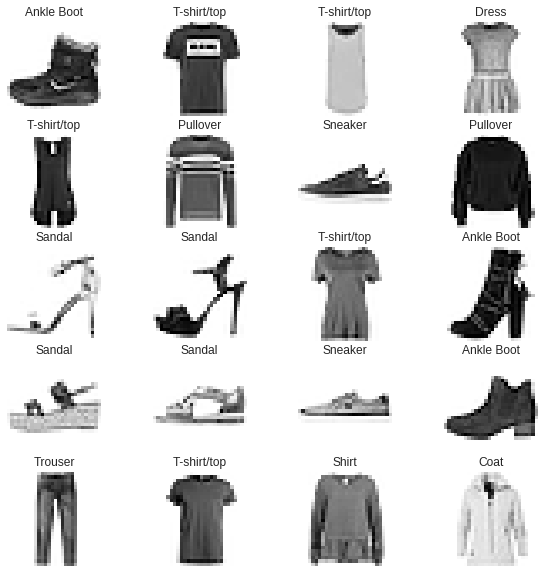

In [6]:
plt.figure(figsize = (10, 10))
for i in range(20):
  plt.subplot(5, 4, i+1)
  img = X_train[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.title(class_names[y_train[i]])

In [0]:
# Preprocessing the dataset
X_train1 = X_train.astype('float32') / 255.0
X_test1 = X_test.astype('float32') / 255.0

In [8]:
print(X_train1.shape)
print(X_train1[0].shape)

(60000, 28, 28)
(28, 28)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


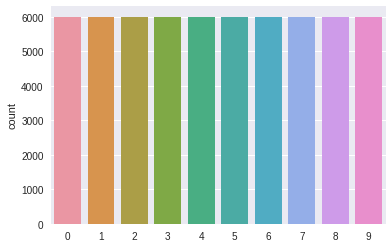

In [9]:
import seaborn as sns
sns.countplot(y_train)
plt.show()

In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(X_train1, X_val1) = X_train1[5000:] , X_train1[:5000]
(y_train1, y_val1) = y_train[5000:] , y_train[:5000]

In [0]:
# Reshape input data from (28, 28) to (28, 28, 1)
X_train1 = X_train1.reshape(X_train1.shape[0], 28, 28, 1)
X_val1 = X_val1.reshape(X_val1.shape[0], 28, 28, 1)
X_test1 = X_test1.reshape(X_test1.shape[0], 28, 28, 1)

In [12]:
# One-hot encoding
from keras.utils import np_utils

y_train1 = np_utils.to_categorical(y_train1)
y_val1 = np_utils.to_categorical(y_val1)
y_test1 = np_utils.to_categorical(y_test)


print("X_train shape: ",X_train1.shape, "X_val shape: ",X_val1.shape, "X_test shape: ",X_test1.shape)
print("y_train shape: ",y_train1.shape, "y_val shape: ",y_val1.shape, "y_test shape: ",y_test1.shape)


# Print the number of training, validation, and test datasets
print(X_train1.shape[0], 'train set')
print(X_val1.shape[0], 'validation set')
print(X_test1.shape[0], 'test set')

X_train shape:  (55000, 28, 28, 1) X_val shape:  (5000, 28, 28, 1) X_test shape:  (10000, 28, 28, 1)
y_train shape:  (55000, 10) y_val shape:  (5000, 10) y_test shape:  (10000, 10)
55000 train set
5000 validation set
10000 test set


In [0]:

# importing  necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, Flatten, MaxPooling2D, Dense
from keras.optimizers import Adam

In [14]:
model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)  

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(X_train1,
         y_train1,
         batch_size=64,
         epochs=10,
         validation_data=(X_val1, y_val1),
         callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 251us/step - loss: 0.6011 - acc: 0.7774 - val_loss: 0.3729 - val_acc: 0.8674

Epoch 00001: val_loss improved from inf to 0.37287, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 9s 156us/step - loss: 0.4171 - acc: 0.8473 - val_loss: 0.3321 - val_acc: 0.8824

Epoch 00002: val_loss improved from 0.37287 to 0.33211, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 9s 156us/step - loss: 0.3737 - acc: 0.8644 - val_loss: 0.2994 - val_acc: 0.8880

Epoch 00003: val_loss improved from 0.33211 to 0.29939, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 9s 158us/step - loss: 0.3470 - acc: 0.8717 - val_loss: 0.2747 - val_acc: 0.9010

Epoch 00004: val_loss improved from 0.29939 to 0.27472, saving

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [18]:
# Evaluate the model on test set
score = model.evaluate(X_test1, y_test1, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9063


In [0]:
y_pred = model.predict(X_test1)

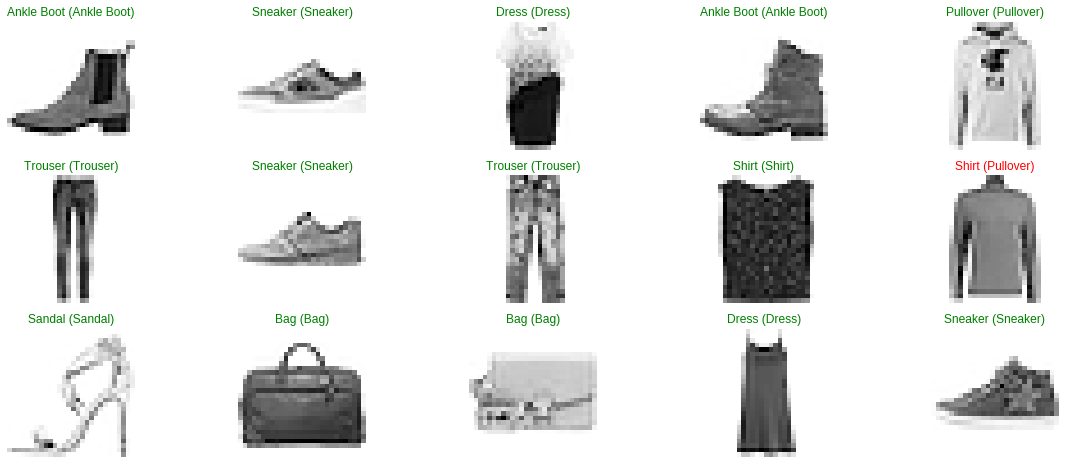

In [23]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(X_test1.shape[0], size=15, replace=False)):
  
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    # Display each image
    ax.imshow(np.squeeze(X_test1[index]))
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test1[index])
    
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Conclusion: Successfully trained CNN model to classify fashion_MNIST with near 90% accuracy.